<a href="https://colab.research.google.com/github/lexiaylin/laboratorio-/blob/main/Laboratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.-PUNTO UNO**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

###**1.   Generador de Dataset aleatorio**

In [ ]:
# Generar número aleatorio de clusters entre 1 y 20
n_clusters = random.randint(1, 20)
print(f"El número de clusters generados es de: {n_clusters}")

El número de clusters generados es de: 5


In [ ]:
# Crear centros bien separados aleatoriamente en un espacio amplio
blob_centers = np.random.uniform(low=-10, high=10, size=(n_clusters, 2))

# Asignar la misma desviación a todos los clusters
blob_std = np.full(n_clusters, 0.7)

# Crear los datos
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)

In [ ]:
#Gráfica
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

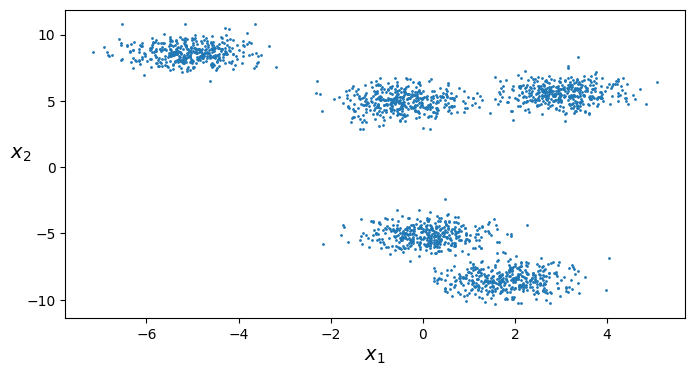

In [ ]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

###**2.   KMeans**

In [ ]:
k = n_clusters
kmeans = KMeans(k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([4, 1, 0, ..., 1, 4, 2], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-0.43999428,  4.96516222],
       [ 0.08480299, -5.09964327],
       [-5.07242211,  8.64391551],
       [ 1.8106622 , -8.48993384],
       [ 3.02669642,  5.57430574]])

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)
#X_new = np.random.uniform(low=-10, high=10, size=(20, 2))  # 20 puntos aleatorios
#kmeans.predict(X_new)

array([0, 4, 0, 0], dtype=int32)

In [ ]:
#GRÁFICA

#Mostrar visualmente la distribución de los datos X en el plano cartesiano
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

#Mostrar gráficamente la posición de los centroides
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

#Visualizar los límites de decisión
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):

  #Establecer los límites del gráfico
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1

    #Crear la malla de puntos
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))

    #Predecir las etiquetas para cada punto de la malla
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    #Dibujar los contornos de decisión
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)

    #Mostrar los centroides (si se solicita)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    #Etiquetas de los ejes
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

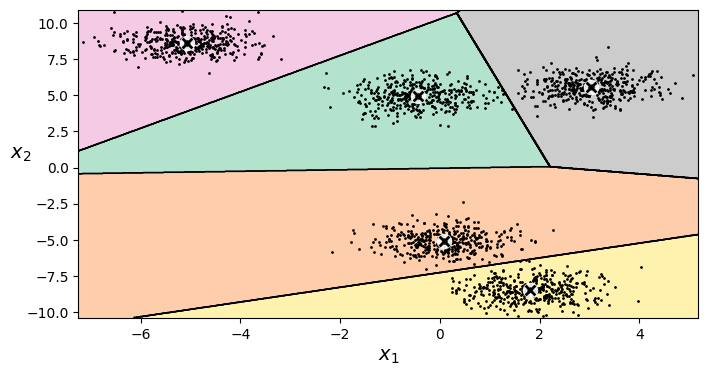

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [ ]:
kmeans.transform(X_new)

array([[ 2.99762939,  7.10014973,  8.35889223, 10.64505564,  4.68364738],
       [ 4.54155784,  7.67484907, 10.45493242, 10.55714148,  3.57440544],
       [ 3.22730411,  8.66719278,  6.0123802 , 12.45636586,  6.5534815 ],
       [ 3.55396315,  8.20186487,  6.48402893, 11.99671274,  6.76553217]])

In [ ]:
#KMeans con distintos valores max_iter
kmeans_iter1 = KMeans(n_clusters, init="k-means++", n_init=1,
                      algorithm="elkan", max_iter=3, random_state=1)

kmeans_iter2 = KMeans(n_clusters, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=2, random_state=1)

kmeans_iter3 = KMeans(n_clusters, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='elkan', max_iter=3, n_clusters=5, n_init=1, random_state=1)

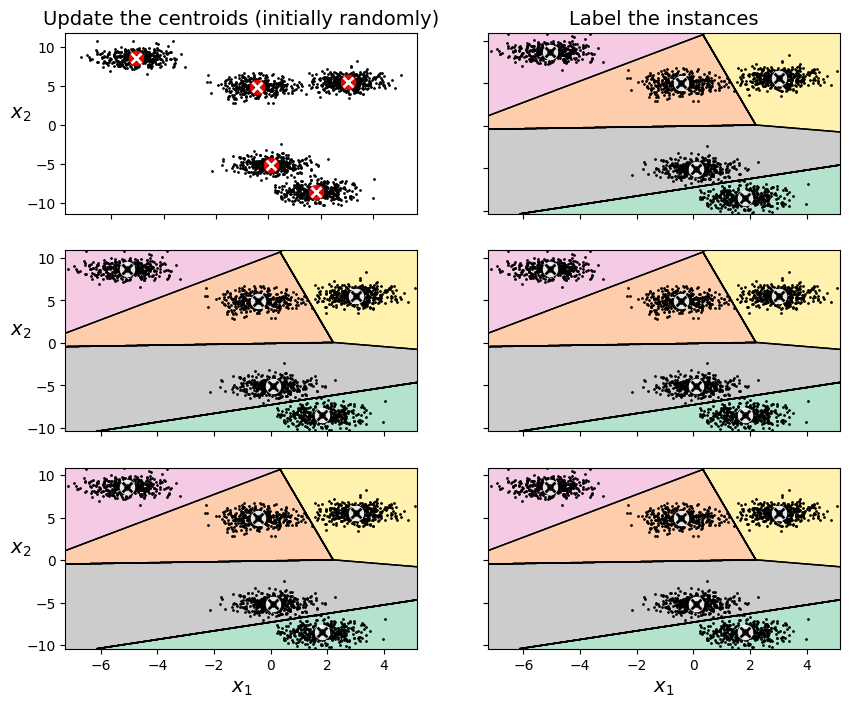

In [ ]:
#GRÁFICAS
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [ ]:
#Comparación de 2 modelos
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):

  #Modelos
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    #Primer gráfico
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    #Segundo gráfico
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

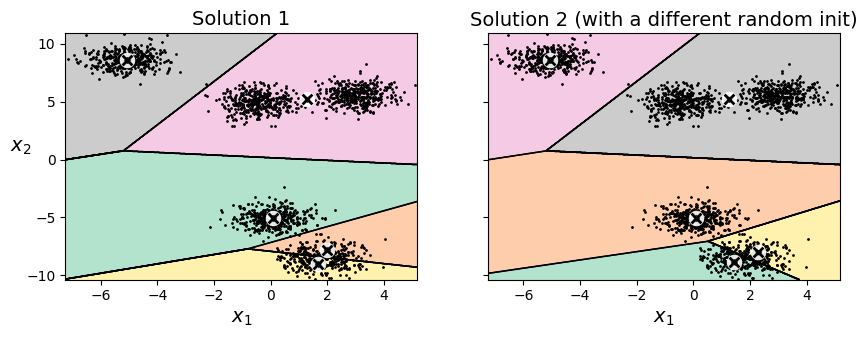

In [ ]:
#Gráficos
kmeans_rnd_init1 = KMeans(n_clusters, init="random", n_init=1,
                         algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters, init="random", n_init=1,
                         algorithm="elkan", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,"Solution 1", "Solution 2 (with a different random init)")

plt.show()

In [ ]:
#valor más alto de n_init
kmeans_rnd_10_inits = KMeans(n_clusters, init="random", n_init=10,
                              algorithm="elkan", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=5, n_init=10,
       random_state=11)

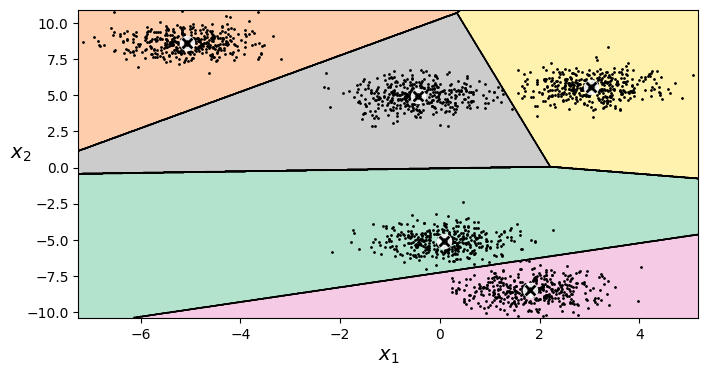

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [ ]:
from sklearn.datasets import fetch_openml

#Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [ ]:
from sklearn.model_selection import train_test_split

#Dividir el conjunto de datos MNIST en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

In [ ]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [ ]:
from sklearn.cluster import MiniBatchKMeans

k = n_clusters
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [ ]:
best_kmeans.score(X)

-1936.6304460578358

###**3.   Silhouette score**

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

np.float64(0.6884397932383022)

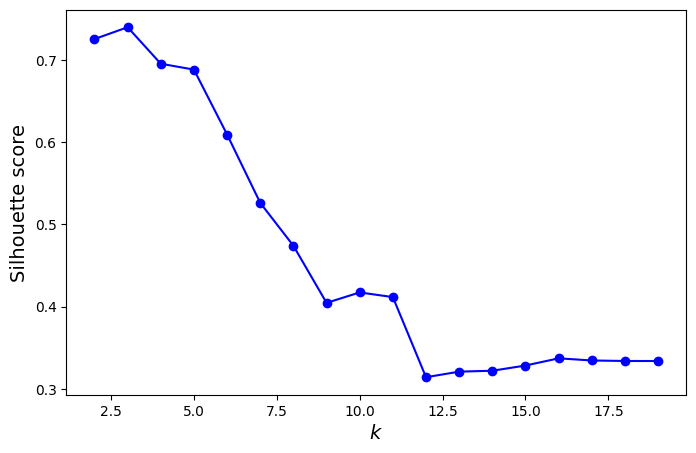

In [ ]:
# Lista para almacenar los modelos KMeans
#kmeans_per_k = [KMeans(n_clusters=np.random.randint(1, 21), random_state=42).fit(X) for _ in range(n_init)]
# Calcular las puntuaciones de silueta para cada modelo KMeans
#silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]
#plt.plot(range(1, n_init + 1), silhouette_scores, "bo-")

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 20)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

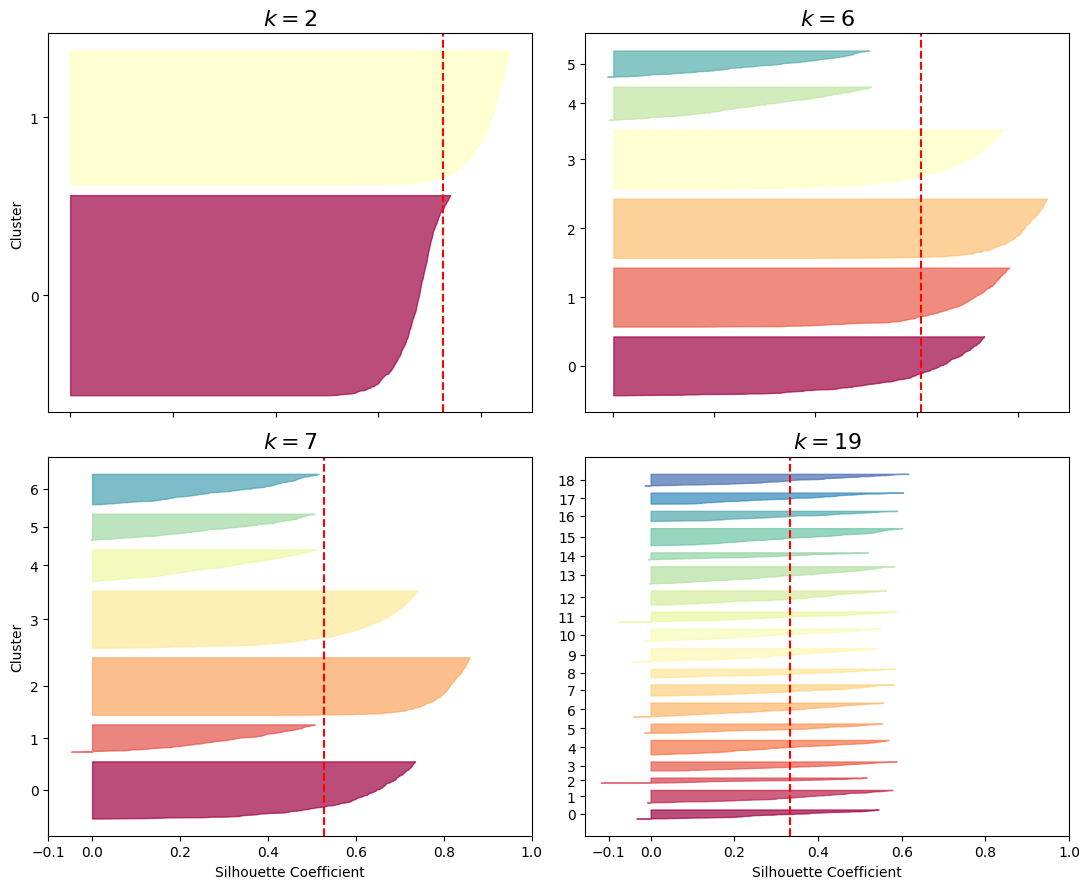

In [ ]:
plt.figure(figsize=(11, 9))

random_k_values = sorted(random.sample(range(2, 21), 4))

kmeans_per_k = []
silhouette_scores = []

for k in random_k_values:
    model = KMeans(n_clusters=k, random_state=42).fit(X)
    kmeans_per_k.append(model)
    silhouette_scores.append(silhouette_score(X, model.labels_))

for index, k in enumerate(random_k_values):
    plt.subplot(2, 2, index + 1)

    y_pred = kmeans_per_k[index].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    # Corregir la indentación del if
    if index % 2 == 0:
        plt.ylabel("Cluster")
    # Corregir la indentación del if
    if index >= 2:
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[index], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=16)

plt.tight_layout()
plt.show()

# **2.- PUNTO DOS**

In [ ]:
import kagglehub
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

###**1. DATASET**

In [ ]:
# Descargar el dataset desde KaggleHub
path = kagglehub.dataset_download("andhikawb/fashion-mnist-png")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fashion-mnist-png


In [ ]:
from tqdm import tqdm

def cargar_imagenes_png(carpeta):
    X = []
    y = []
    clases = sorted(os.listdir(carpeta))

    for etiqueta, clase in enumerate(clases):
        ruta_clase = os.path.join(carpeta, clase)
        for nombre_img in tqdm(os.listdir(ruta_clase), desc=f"Cargando {clase}"):
            ruta_img = os.path.join(ruta_clase, nombre_img)
            img = Image.open(ruta_img).convert("L")  # Escala de grises
            X.append(np.array(img).flatten())  # Convertir a vector de 784
            y.append(etiqueta)

    return np.array(X), np.array(y)

In [ ]:
# Cargar conjunto de entrenamiento
train_folder = os.path.join(path, "train")
X_train, y_train = cargar_imagenes_png(train_folder)

Cargando 9: 100%|██████████| 6000/6000 [00:03<00:00, 1514.13it/s]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

###**2. APRENDIZAJE SEMI-SUPERVISADO**

In [ ]:
from sklearn.cluster import KMeans

k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_dist = kmeans.fit_transform(X_train)

In [ ]:
print(X_dist.shape)
print(X_dist)

(48000, 50)
[[2639.46903246 1762.6516051  1541.9417669  ... 2899.89103911
  2546.67799758 2620.08637517]
 [2783.73746168 2677.27729795 2055.05145653 ... 2231.07726056
  2724.55314696 2193.6556598 ]
 [2380.22624255 2305.09295634 1585.18759296 ... 2060.96057999
  2342.1876361  1962.4169013 ]
 ...
 [2295.86109618 3531.62190849 2349.95494236 ... 1650.09726587
  2156.56540306 3149.27228796]
 [3347.66101412 4162.9110328  3358.11063579 ... 2240.14082794
  3244.48440443 3139.74185969]
 [3385.45654702 2496.46656413 2683.35554776 ... 3377.1117945
  3447.10935495 2785.20700624]]


In [ ]:
idxs = np.argmin(X_dist, axis=0)
X_representative_digits = X_train[idxs]

In [ ]:
print(X_representative_digits.shape)
print(X_representative_digits)

(50, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


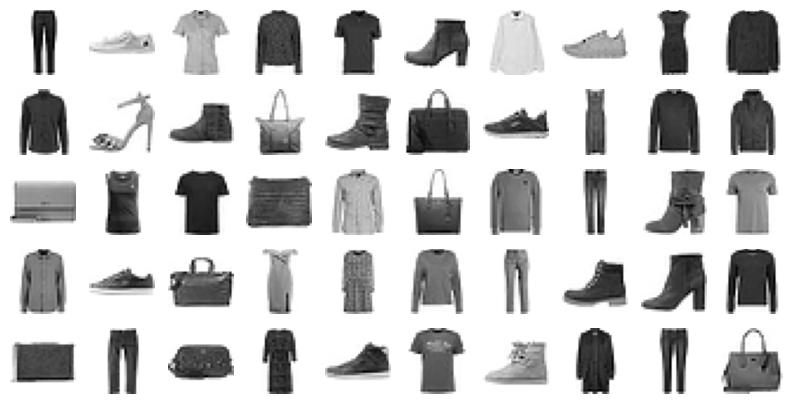

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for index, X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(5, 10, index+1)
  plt.imshow(X_representative_digit.reshape(28,28), cmap="binary")
  plt.axis('off')
plt.show()

In [ ]:
y_representative_digits = y_train[idxs]

In [ ]:
from sklearn.linear_model import LogisticRegression


log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)
log_reg2.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 1.05 s, sys: 5.91 ms, total: 1.05 s
Wall time: 1.03 s


0.6699166666666667

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train[:50], y_train[:50])
log_reg.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 517 ms, sys: 5.37 ms, total: 522 ms
Wall time: 436 ms


0.6405

In [ ]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 20.4 s, sys: 13.7 ms, total: 20.4 s
Wall time: 14.8 s


0.6425

###**3. APRENDIZAJE ACTIVO**

In [ ]:
probas = log_reg3.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]]

array([0.99912738, 0.99952797, 0.99959713, 0.99960996, 0.99962683,
       0.99964241, 0.99964785, 0.99966431, 0.99967716, 0.99969319])

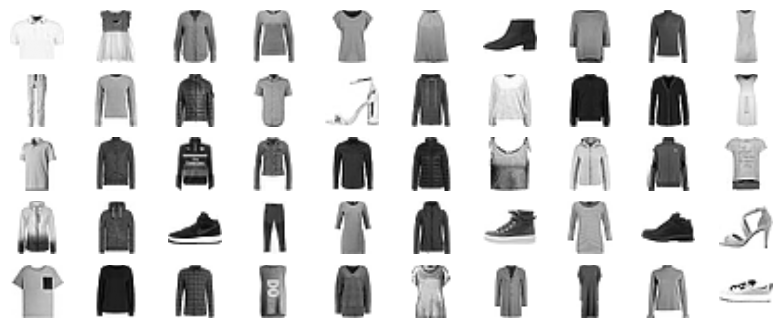

In [ ]:
X_lowest = X_train[:1000][sorted_ixs[:k]]
plt.figure(figsize=(10, 4))
for index, img in enumerate(X_lowest):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

Etiqueta y descripción:
0 = camiseta/top, 1 = Pantalón, 2 = Pull-over, 3 = Vestido, 4 = 	Abrigo, 5 = 	Sandalia, 6 = 	Camisa, 7 = 	Zapatilla deportiva, 8 = 	Bolsa, 9 = 	Botín

In [ ]:
y_lowest = y_train[:1000][sorted_ixs[:k]]
y_lowest

array([0, 3, 6, 2, 0, 6, 9, 2, 2, 3, 1, 2, 4, 6, 5, 2, 2, 4, 6, 3, 0, 4,
       2, 4, 6, 4, 6, 4, 4, 0, 4, 4, 7, 1, 3, 4, 9, 0, 9, 5, 0, 2, 6, 0,
       2, 0, 4, 3, 2, 7])

In [ ]:
y_train2 = y_train_propagated[:1000].copy()
y_train2[sorted_ixs[:k]] = y_lowest

In [ ]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 18.4 s, sys: 38.9 ms, total: 18.4 s
Wall time: 10.9 s


0.652